<a href="https://colab.research.google.com/github/Fred66X/DS_Projects/blob/main/Predicting_Fashion_Images_with_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2018 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [ ]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# Classification: Predicting Fashion Images with Neural Networks

In this notebook we will train a neural network to classify images of clothing such as sneakers and t-shirts.

Using [tf.keras](https://www.tensorflow.org/guide/keras), best API to build and to train Tensorflow models.

In [ ]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.15.0


## Importing the MNIST fashion dataset

Dataset is from [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)
which contains over 70,000 images in 10 categories. The images show individual articles of clothing at a low resolution (28 by 28 pixels) as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Here, 60,000 images are used to train the neural network and 10,000 images are used to evaluate the accuracy of the model when fed new data.

To import and load the MNIST dataset directly from TensorFlow:

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

When loading the dataset we get four arrays:

* The `train_images` and `train_labels` arrays are the *training set* — the data that the model uses to learn.
* The `test_images` and `test_labels` arrays are the *test set* — the one we test our models against.

The images are 28x28 NumPy arrays, with pixel values ​​ranging from 0 to 255. The *labels* are integer arrays, ranging from 0 to 9.

These correspond to the *class* of clothing that the image represents.

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Each image is mapped to a unique label.

*Class names* are not included in the dataset, so we store them for later use when displaying the images:

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


## Let's see what is in the dataset

We explore the dataset before we start training the model.

There are 60,000 images in the train set, each image represented by 28x28 pixels:

In [ ]:
train_images.shape

(60000, 28, 28)

There's 60,000 labels in the training set:

In [ ]:
len(train_labels)

60000

Each label is an integer between 0 and 9:

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

There are 10,000 images in the test set.

Again, each image is represented as 28x28 pixels:

In [ ]:
train_images.shape[1]

28

In [ ]:
test_images.shape

(10000, 28, 28)

And the test set contains 10,000 image labels:

In [ ]:
len(test_labels)

10000

In [ ]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

## Pre-processing

The dataset must be pre-processed before training the neural network.

If we inspect the first image in the train set, we see that the pixel values ​​are between 0 and 255:

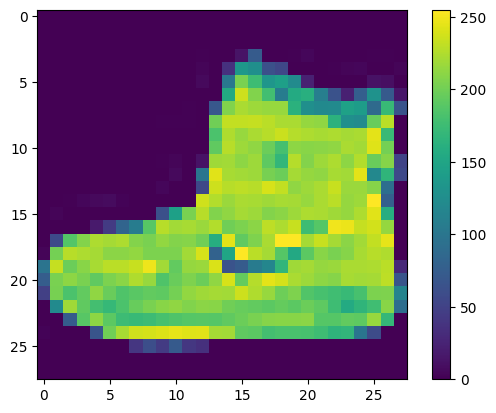

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

We standardize these values ​​to a range of 0 to 1 before passing them to the neural network.

To do this, we divide the values ​​by 255.

It is important that the *train set* and the *test set* are pre-processed in the same way:

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

To verify that the dataset is in the correct format and that we are ready to build and train the network, we will visualize the first 25 images of the *train set* and display the name of each class below each image.

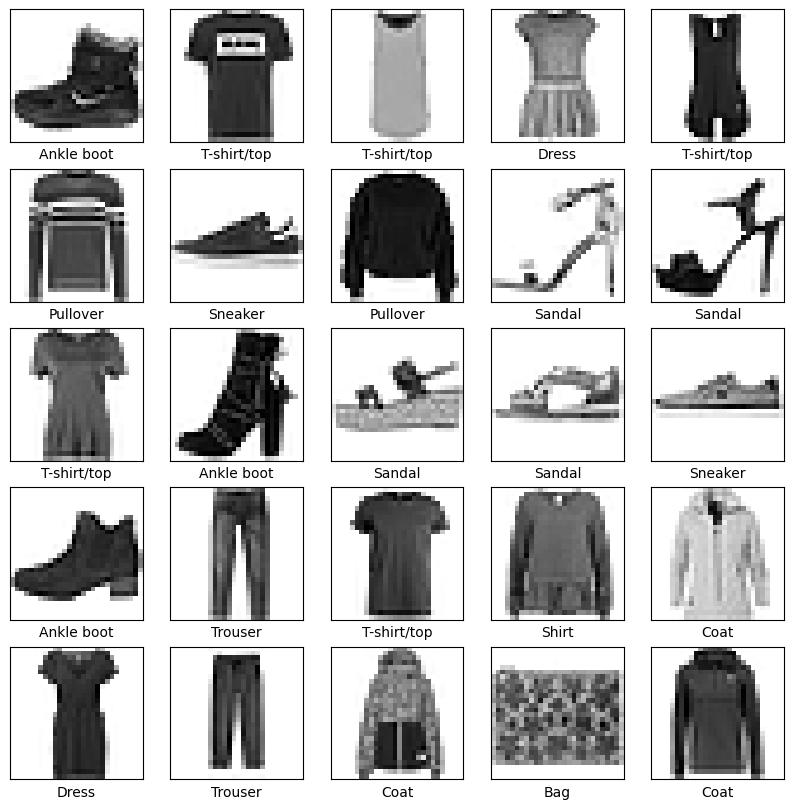

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Let's build the model

To build the neural network we need to configure the layers of the model, and then compile the model.

## Layers configuration

The basic building blocks of a neural network are layers.

In most cases, building a deep neural network consists of putting together several simple layers.

Here we use tf.keras.layers.Dense to build such a neural network:
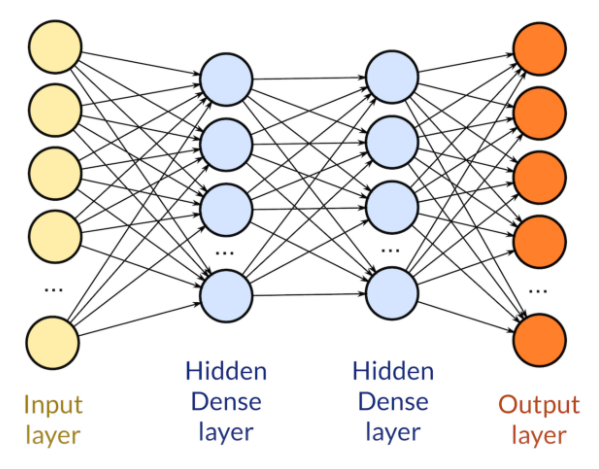

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

The first layer, `tf.keras.layers.Flatten`,
transforms images from a two-dimensional array (28x28 pixels) to a one-dimensional array (28*28 pixels = 784 pixels).

This corresponds to "flattening" our images.

After having "flattened" the pixels, we have two `tf.keras.layers.Dense` layers that are densely connected.

The first `Dense` layer has 128 nodes (or neurons) and the *relu* activation function.

The second (and last) layer is a 10-node *softmax* layer that returns an array of 10 probabilities that sum to 1. Each node contains a score that indicates the probability that the current image belongs to one of the 10 classes.

The softmax function is usually used as the final layer of neural network-based classifiers. Converts an array of K real values ​​into an array of K real values ​​that sum to 1.

### Compiling the model

Before we start training the model, we need to set up a few more things:

Before we start training the model, we need to set up a few more things:

* [*Loss function*](https://www.tensorflow.org/api_docs/python/tf/keras/losses) — This measures how accurate the model is during training. We want to minimize this function. The most common ones are:
- ‘binary_crossentropy‘ for binary classification
- ‘sparse_categorical_crossentropy‘ for multi-class classification
- ‘mse‘ (mean squared error) for regressions
* [*Optimizer*](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) — This is the technique used to minimize the loss function. Here we will use `ADAM`, which uses an adaptive learning rate, meaning it calculates individual learning rates for different parameters.
* [*Metrics*](https://www.tensorflow.org/api_docs/python/tf/keras/metrics) — These are used to monitor the train and test steps.
Our example uses *accuracy* as a metric, the ratio of images that are correctly classified.

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Training the Model

Training the neural network model requires the following steps:

1. Training data enters the model. In our example, the train data is in the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. We ask the model to make predictions on the test dataset, which is in the `test_images` array. Check that the predictions match the labels in the `test_labels` array.

To start training, we call the `model.fit` method, so named because it *fits* the model to the training dataset:

In [ ]:
model.fit(train_images, train_labels, epochs=10, verbose=1)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 1.0673 - accuracy: 0.6633
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6326 - accuracy: 0.7720
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5603 - accuracy: 0.8005
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5194 - accuracy: 0.8162
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4923 - accuracy: 0.8264
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4730 - accuracy: 0.8340
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4587 - accuracy: 0.8384
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4473 - accuracy: 0.8433
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4378 - accuracy: 0.8456
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.429

Here we select the training configuration, in this case the number of epochs (iterations), and verbose, which can be:
- 0 = silent
- 1 = progress bar
- 2 = one line per epoch, with a summary of the performance in each iteration

A medida que el modelo entrena, visualizamos la perdida (loss) y la métrica seleccionada (accuracy).

Training (fit) applies the chosen optimization algorithm to minimize the chosen loss function and updates the model using the error back-propagation algorithm.

Training is the slowest part of the entire process, and can take seconds, hours, or days, depending on the complexity of the model, the hardware you are using, and the size of the train set.

## Evaluating Accuracy

To evaluate the model we select the data set to test against (test set). It has to be data that is not used in the training process, so that we can get an unbiased estimate of the model's performance when making predictions on new data.

The speed of model evaluation is proportional to the amount of data we use for evaluation, although it is much faster than training since the model does not change.

Here we are evaluating the accuracy of our model:

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.4579 - accuracy: 0.8349 - 1s/epoch - 4ms/step

Test accuracy: 0.8349000215530396


It turns out that the accuracy on the test set is slightly lower than the accuracy on the train set.

This difference between train and test is due to overfitting.

Overfitting occurs when a machine learning model performs worse on a new data set, one it has never seen before, compared to the training set.

## Making predictions

This is the final step in our model's lifecycle. It's the reason we want the model in the first place.

We need to pass it the data for which we want a prediction, i.e. the input data without having the target labels.

We simply call the *predict()* function to predict, and the output will be a class label, probability, or numeric value (depending on what our model's target is):

In [ ]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


The model has estimated the label for each image in the *test* dataset.

Let's look at the first prediction:

In [ ]:
predictions[1]

array([3.5275886e-04, 6.1348396e-06, 8.8653594e-01, 2.7996884e-05,
       1.4473978e-02, 1.6033304e-10, 9.8554403e-02, 8.9042638e-17,
       4.8730442e-05, 1.3197254e-12], dtype=float32)

A prediction is an array of 10 numbers.

These numbers represent the probability, according to the model, that the image belongs to a certain class of clothing.

We can look at which class corresponds to the highest level of confidence:

In [ ]:
np.argmax(predictions[0])

9

In this case, the highest confidence level corresponds to class 9 ("ankle boot" or `class_names[9]`).

Examining the labels of the *test* dataset, we see that this classification is correct:

In [ ]:
test_labels[0]

9

We want to visualize the prediction for each of the 10 classes:

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  # junto a la imagen, queremos visualizar la predicción con confianza más alta
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], # etiqueta predecida
                                100*np.max(predictions_array), # nivel de confianza
                                class_names[true_label]), # etiqueta real
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  # visualizamos el nivel de confianza para todas las clases (color grís)
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  # la etiqueta predecida y la real, en rojo y azul respectivamente
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

## It's time to visualize the predictions, let's see if works ...

We look at image [0] and its predictions.




Correct labels are in blue and incorrect labels are in red. The number represents the percentage (out of 100) for the predicted label.




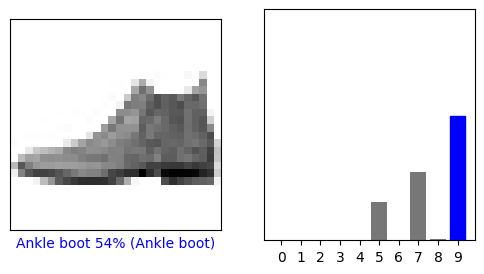

In [ ]:
# el indice representa la imagen que queremos visualizar
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
# visualizamos la imagen, la etiqueta predecida y la real
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
# visualizamos el nivel de confianza para las 10 clases
plot_value_array(i, predictions[i],  test_labels)
plt.show()

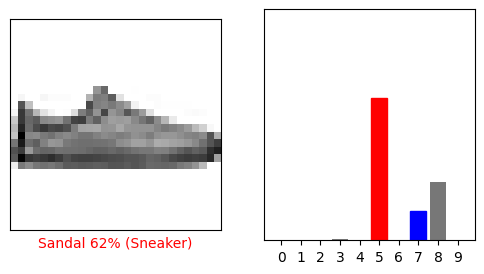

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Let's look at some more images with their predictions.

Note that the model can be wrong, even if we have a lot of confidence.

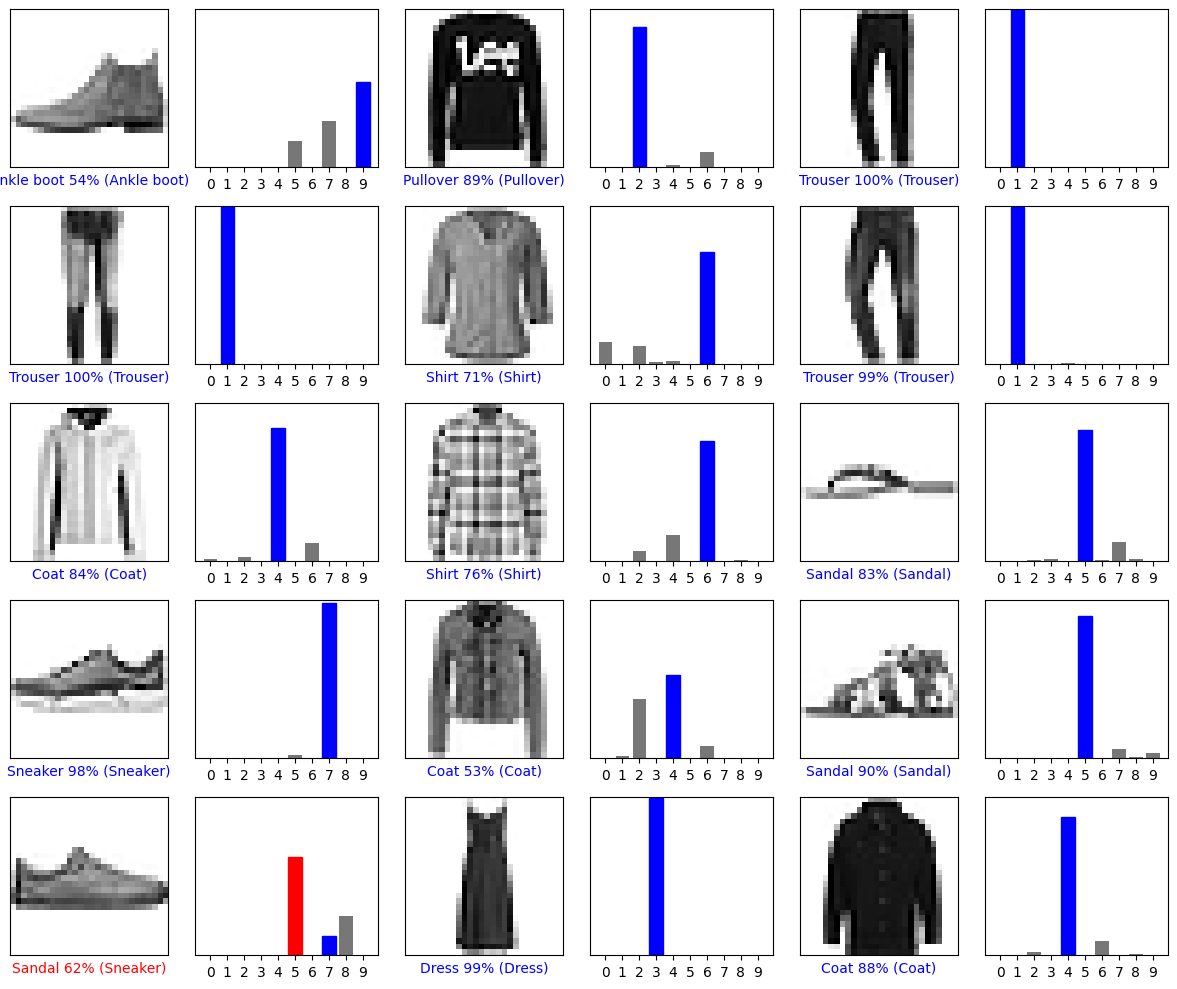

In [ ]:
# we display the first X images, the predicted labels and the actual labels.
# The correct labels are in blue, the incorrect ones in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Apply the model to a single image

We use the trained model to make a prediction on a single image:

In [ ]:
# we choose an image from our dataset
img = test_images[1]

print(img.shape)

(28, 28)


Even though we are using a single image, it has to be part of a list:

In [ ]:
#we add the image to a list
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Now we predict the label for this image:

In [ ]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 24ms/step
[[3.5275889e-04 6.1348464e-06 8.8653606e-01 2.7996863e-05 1.4473938e-02
  1.6033244e-10 9.8554321e-02 8.9042651e-17 4.8730355e-05 1.3197231e-12]]


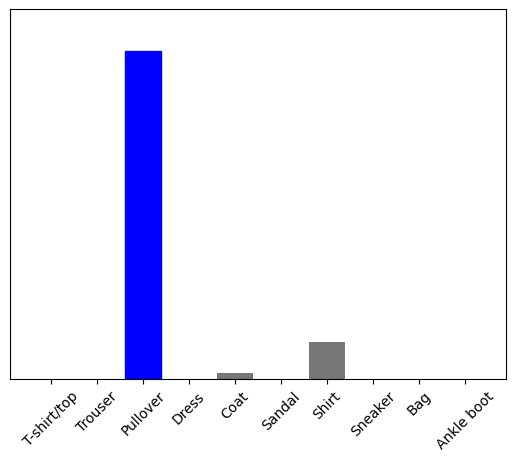

In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

We look for the label with the highest level of confidence:

In [ ]:
np.argmax(predictions_single[0])

2

And the model predicts label 2, which indeed corresponds to the real label.

In [ ]:
test_labels[1]

2

In conclusion, we can summarize the modeling flow in the following steps:
- *compile* method, to define elements such as loss function, optimizer and metric
- *fit* method, to train the model with train data and labels
- *evaluate* method, which returns the loss and metric for the test data
- *predict* method, returns the predictions (output) for the test data (input)

In this link we have more details about these methods: https://keras.io/api/models/model_training_apis/